In [8]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# import required libraries

from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier

#### Setting configurations

In [10]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None) # Display all  columns of dataframe

import warnings
warnings.filterwarnings("ignore")          # Supress warnings

#### Reading Dataset

In [11]:
# Importing churn.csv
churn = pd.read_csv('train.csv')

# look at initial rows of the data
churn.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [12]:
# feature type summary
print("Shape of dataframe is "+str(churn.shape)+"\n")
print("Information about dataframe: ")
churn.info()

Shape of dataframe is (69999, 172)

Information about dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [13]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

### Data Understanding

In [14]:
# look at data statistics
churn.describe(include='all')


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

<AxesSubplot:>

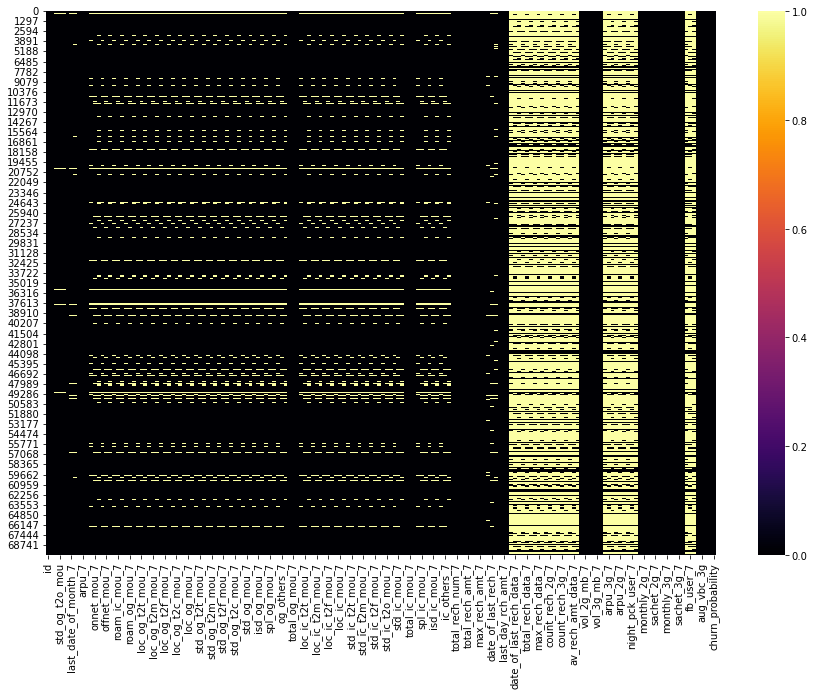

In [15]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(churn.isna(),cmap='inferno')

Some of the columns have null values

#### Scatter plot  for numerical columns
To understand even at all there is any linear relationship among the variable

<Figure size 720x360 with 0 Axes>

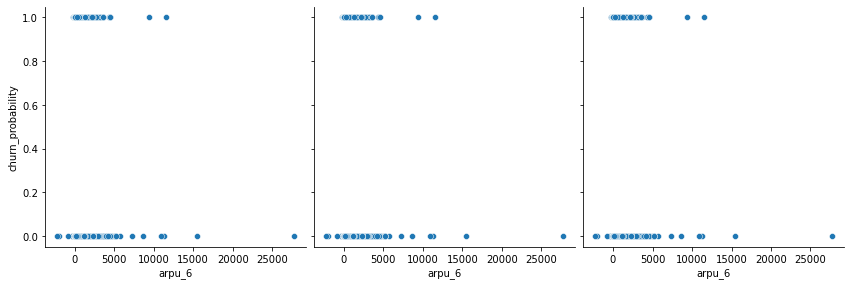

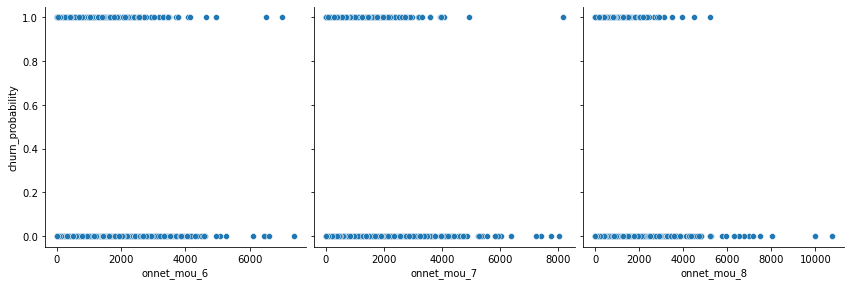

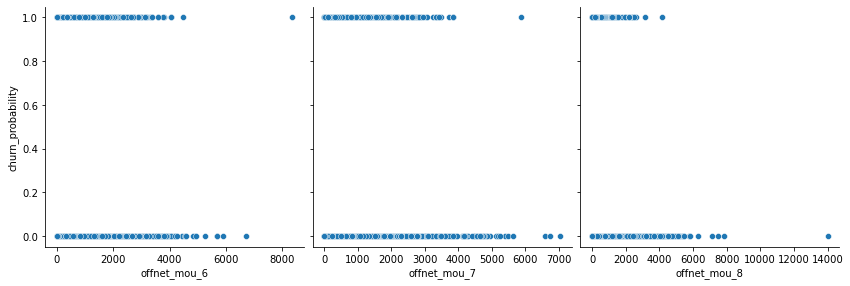

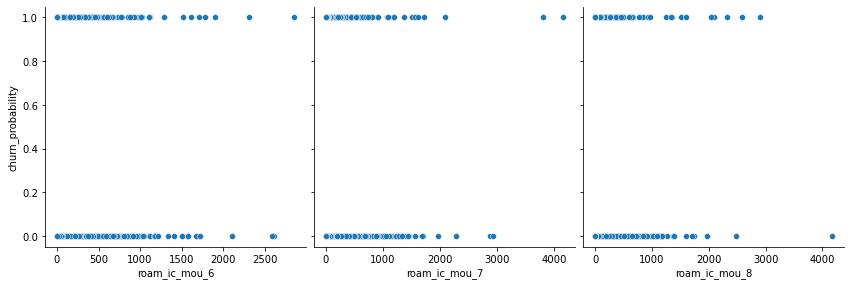

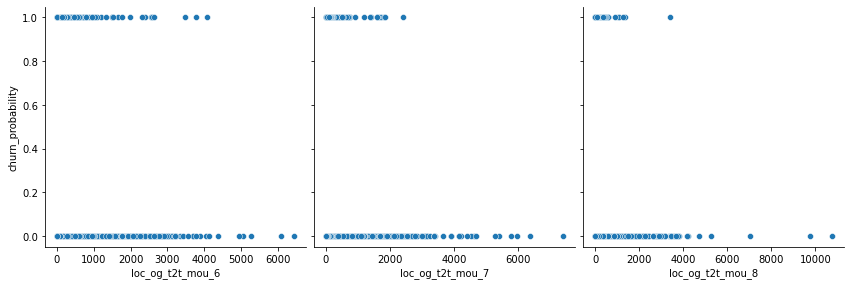

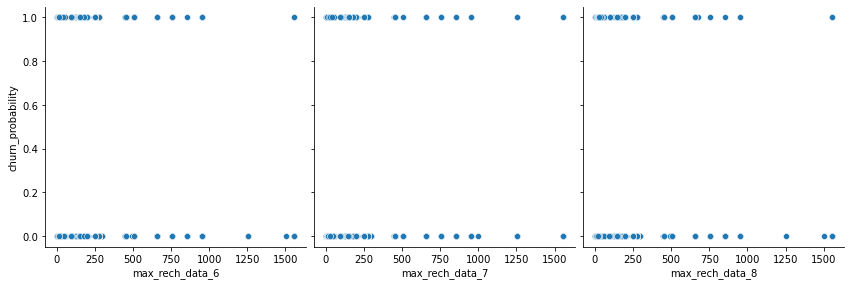

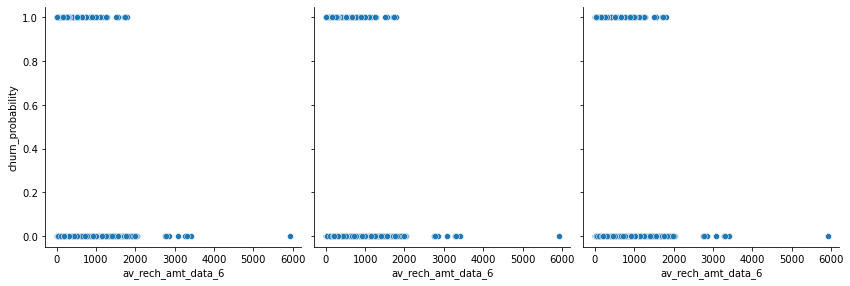

In [16]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(churn, x_vars=['arpu_6', 'arpu_6','arpu_6'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['onnet_mou_6', 'onnet_mou_7','onnet_mou_8'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['offnet_mou_6','offnet_mou_7', 'offnet_mou_8'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_8'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['loc_og_t2t_mou_6','loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['max_rech_data_6','max_rech_data_7', 'max_rech_data_8'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
sns.pairplot(churn, x_vars=['av_rech_amt_data_6','av_rech_amt_data_6','av_rech_amt_data_6'], y_vars='churn_probability',height=4, aspect=1,kind='scatter')
plt.show()

#### Heatmap for the data
To identify if there are any higly correlated columns

In [ ]:
# Check the correlation of numerical columns
data_correlation = churn.corr().round(2)
sns.set(font_scale=1.2)
sns.clustermap(data_correlation,annot=True,annot_kws={'size': 12}
               ,figsize=(24,24)
               ,col_cluster=False,row_cluster=False,cmap="YlGnBu")

plt.show()

### Data Preparation

In [ ]:
# create backup of data
original = churn.copy()

In [ ]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#### Columns having unique values, distinct values, low cardinality are not useful in this case so dropping them will be a better step for accuracy -

In [ ]:
# drop id and date columns
# Dropping ID as it does not contribute to model learnig
# Dropping Date column as it does not contribute model building 
# Drop the following columns that have more than 85% values associated to a specific value (low cardinality)

print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

#### Handling missing values

In [ ]:
# It is also observed that the recharge date and the recharge value are missing together
# which means the customer didn't recharge, so wecan impute it to 0
# churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)


# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# replace missing values with '-1' in categorical columns
# Replace NaN values in categorical variables We will replace missing values in the categorical values with '-1' where '-1' will be a new category.
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

In [ ]:
# Dropping the columns which have more than 70% of the missing values
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]


# drop columns
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

In [ ]:
mou_cols = churn.columns[churn.columns.str.contains('mou')]

# replaceing null values by 0 for minutes of usage variables
churn.loc[:,mou_cols] = churn.loc[:,mou_cols].replace(np.NaN,0)

In [ ]:
others_cols = churn.columns[churn.columns.str.contains('others')]

# replaceing null values by 0 for minutes of usage variables
churn.loc[:,others_cols] = churn.loc[:,others_cols].replace(np.NaN,0)

In [ ]:
# Checking percentage of missing values in columns
(round(100*(churn.isnull().sum()/len(churn.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False).head(10)


In [ ]:
churn.describe()

In [ ]:
## Dropping columns with all values as 0
churn = churn.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

In [ ]:
print('Shape of dataframe:',churn.shape)
churn.head(5)


### Outlier Treatment
As per the boxplot above we have outliers

In [ ]:
churn.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

In [ ]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [ ]:
num_cols = churn.columns
# cap outliers in the numeric columns
churn[num_cols] = churn[num_cols].apply(cap_outliers, axis=0)

In [ ]:
churn.shape

### Identifying high value customer
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two mont

In [ ]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6.astype(float) * churn.av_rech_amt_data_6.astype(float)
churn['total_data_rech_7'] = churn.total_rech_data_7.astype(float) * churn.av_rech_amt_data_7.astype(float)

# Total recharge amount for June and July 
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

# average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

churn[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

In [ ]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

In [ ]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = churn.loc[churn.av_amt_data_6_7 > churn.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

In [ ]:
# Checking percentage of missing values in columns
(round(100*(churn.isnull().sum()/len(churn.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False).head(5)

In [ ]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

In [ ]:
high_val_cust.head()

In [ ]:
print("Churn Ratio:")
print(high_val_cust.churn_probability.value_counts()*100/high_val_cust.shape[0])

### Exploratory Data Analysis

In [ ]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        

In [ ]:
univariate(high_val_cust.arpu_6)

In [ ]:
univariate(high_val_cust.onnet_mou_6)

In [ ]:
univariate(high_val_cust.aon)

In [ ]:
# create function to anlyze the features across 6th, 7th and 8th month
def Bivariate(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_val_cust[high_val_cust["churn_probability"] == churn][cols[6]].mean(),
        "mean_7": high_val_cust[high_val_cust["churn_probability"] == churn][cols[7]].mean(),
        "mean_8": high_val_cust[high_val_cust["churn_probability"] == churn][cols[8]].mean(),
        "std_6": high_val_cust[high_val_cust["churn_probability"] == churn][cols[6]].std(),
        "std_7": high_val_cust[high_val_cust["churn_probability"] == churn][cols[7]].std(),
        "std_8": high_val_cust[high_val_cust["churn_probability"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_val_cust, y=feature_start + "_6", x="churn_probability",
                hue="churn_probability", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_val_cust, y=feature_start + "_7",  x="churn_probability",
                hue="churn_probability", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_val_cust, y=feature_start + "_8",  x="churn_probability",
                hue="churn_probability", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

In [ ]:
Bivariate('total_rech_amt')

In [ ]:
# let's analyze total recharge amount for data:
Bivariate('max_rech_amt')

In [ ]:
pd.crosstab(high_val_cust.churn_probability, high_val_cust.sachet_3g_8)


In [ ]:
# let's analyze night pack user for data:
Bivariate('night_pck_user')

In [ ]:
# let's analyze night pack user for data:
Bivariate('onnet_mou')

### EDA Summary


Customers for whom there is significant decrease in total_rech_amt for the month of August are more likely to churn

Customers for whom there is significant decrease in max_rech_amt for the month of August are more likely to churn

Customers who are not using night package for August month are more likely to churn

Customers for whom there is significant decrease in calls for the month of August are more likely to churn

About 8% of high value customers are churning

## Model Building

Step 2: - Preparing the data for modelling
Test-Train Split

In [ ]:
# Splitting data into train and test set with 75:25 ratio


X = high_val_cust.drop("churn_probability", axis = 1)
y = high_val_cust.churn_probability.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)


print("Shape of train dataframe is "+str(X_train.shape)+"\n")
print("Shape of test dataframe is "+str(X_test.shape)+"\n")

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

# # aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())

In [ ]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

In [ ]:
# replace categories with aggregated values in each categorical column

mapping = {'night_pck_user_6' : {-1: 0.098157, 0: 0.069337, 1: 0.100503},
           'night_pck_user_7' : {-1: 0.114542, 0: 0.058190, 1: 0.058537},
           'night_pck_user_8' : {-1: 0.141213, 0: 0.030952, 1: 0.017045},
           'fb_user_6'        : {-1: 0.098157, 0: 0.086601, 1: 0.068800},
           'fb_user_7'        : {-1: 0.114542, 0: 0.066372, 1: 0.057527},
           'fb_user_8'        : {-1: 0.141213, 0: 0.078947, 1: 0.025013}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

#### Rescaling 
Rescalling the numerical columns using MinMaxScaler

In [ ]:
# Scaling only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Instantiate the scaler
scaler = MinMaxScaler()


# Fit the data into scaler and transform

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

In [ ]:
# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) 
X_test.head()

## Model 1: Principal Component Analysis with Logistic Regression

In [ ]:
## Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(random_state=42)

## Doing the PCA on the train data
pca.fit(X_train)

# Principal components as obtained 
pca.components_

In [ ]:
# Variance explained by each Principal Componets respectively
pca.explained_variance_ratio_

In [ ]:
# Getting the cummulative variance explained by principal components

var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# Plotting scree plot and getting the number of principal componets to obtain 95% variance explaination

fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

As from the above Scree plot its clear that 95% of variance can be explained with 60 Principal Components 

In [ ]:
# Creating final PCA model with incremental components upto 60
pca_final = IncrementalPCA(n_components=60)

# training the model
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
#plotting the correlation matrix of principal components ; Black color shows principal components are non-related 

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(df_train_pca.transpose()), annot=True)

Applying logistic regression on the data from our Principal components

In [ ]:
# We are class_weight as our data is not balanced

learner_pca = LogisticRegression(random_state=42,class_weight={0:0.1, 1: 0.9})

# training the model
model_pca = learner_pca.fit(df_train_pca, y_train)

In [ ]:
# Score of the PCA model

round(model_pca.score(df_train_pca, y_train) * 100, 2)

In [ ]:
# predicting on the test_data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
df_y_pred = model_pca.predict(df_test_pca)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics


print("\n-----------------------  Confusion Matrix ---------------------\n ")
print(confusion_matrix(y_test, df_y_pred))
print("\n-----------------------  Classification Report ---------------------\n")
print(classification_report(y_test,df_y_pred))
print("\n -----------------------  Accuracy Score ---------------------\n")
print('Accuracy : ', round(accuracy_score(y_test,df_y_pred),2))
print("\n------------------------ Sensitivity ------------------\n")
cm2  = confusion_matrix(y_test, df_y_pred)
sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

print("\n ------------------------ Precision ----------------------------\n")
print('Precision :',round(precision_score(y_test,df_y_pred),2))
print("\n ------------------------- Recall ------------------------------\n")
print('Recall :',round(recall_score(y_test,df_y_pred),2))

# check area under curve
print("\n------------------------ AUC ------------------\n")
# pred_probs_test = model_pca.predict_proba(df_test_pca)[:, 1]
print("\nAUC:    \t", round(roc_auc_score(y_test, df_y_pred),2))

In [ ]:
# Plotting the Principal Components for the train dataset

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Model 2 : Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Building default decision tree with no tunning except for class_weight as we are aware of class_imbalance

dt_default = DecisionTreeClassifier(random_state=42,class_weight={0:0.1, 1: 0.9})
dt_default.fit(X_train, y_train)


In [ ]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



print("\n-----------------------  Confusion Matrix ---------------------\n ")
print(confusion_matrix(y_test, y_pred_default))
print("\n--------------------  Classification Report --------------------\n")
print(classification_report(y_test,y_pred_default))
print("\n ---------------------  Accuracy Score -------------------------\n")
print('Accurracy :',round(accuracy_score(y_test,y_pred_default),2))
print("\n ----------------------- Sensitivity ---------------------------\n")


cm1  = confusion_matrix(y_test, y_pred_default)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

print("\n ------------------------ Precision ----------------------------\n")
print('Precision :',round(precision_score(y_test,y_pred_default),2))
print("\n ------------------------- Recall ------------------------------\n")
print('Recall :',round(recall_score(y_test,y_pred_default),2))

# check area under curve
y_pred_prob = dt_default.predict_proba(X_test)[:, 1]
print("\n-------------------------- AUC ---------------------------------\n")
print("AUC:", round(roc_auc_score(y_test, y_pred_default),2))
print("\n----------------------------------------------------------------\n")

Hyperparameter tuning for Decision tree using grid search

In [ ]:
# Create the parameter grid 


param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50), 
    'max_features': [5, 10, 15],
    'criterion': ["entropy", "gini"]
}


n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42,class_weight={0:0.1, 1: 0.9})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)


# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# cv results for Decision Tree grid search
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", round(grid_search.best_score_,3))
print("\nOptimal hyperparameters for this accuracy:\n")
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=4,
                                  max_features =5,
                                  min_samples_leaf=10,
                                  min_samples_split=10,
                                 class_weight={0: 0.1, 1: 0.9})
clf_gini.fit(X_train, y_train)

In [ ]:
# Making predictions
y_pred = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix



print("\n-------------------- Confusion Matrix ----------------------- ")
print(confusion_matrix(y_test, y_pred))
print("\n------------------ Classification Report ---------------------")
print(classification_report(y_test,y_pred))
print("\n ------------------  Accuracy Score --------------------------")
print('Accurracy :',round(accuracy_score(y_test,y_pred),2))
print("\n --------------------- Sensitivity ---------------------------")
cm1  = confusion_matrix(y_test, y_pred)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

print("\n ------------------------ Precision ----------------------------\n")
print('Precision :',round(precision_score(y_test,y_pred),2))
print("\n ------------------------- Recall ------------------------------\n")
print('Recall :',round(recall_score(y_test,y_pred),2))

# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("\n------------------------ AUC ---------------------------------")
print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))
print("\n----------------------------------------------------------------\n")

## Model 3 : Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Creating a default randForest classifier without hyper tuning
# Running the random forest with class_weight as class is imbalance
rfc = RandomForestClassifier(random_state=42,class_weight={0:0.1, 1: 0.9})
rfc.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Importing classification report 
from sklearn.metrics import classification_report


print("\n-----------------------  Confusion Matrix --------------------- ")
print(confusion_matrix(y_test, predictions))
print("\n-----------------------  Classification Report ---------------------")
print(classification_report(y_test,predictions))
print("\n -----------------------  Accuracy Score ---------------------")
print('Accurracy :',round(accuracy_score(y_test,predictions),2))
print("\n ----------------------- Sensitivity -------------------------")
cm1  = confusion_matrix(y_test, predictions)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

print("\n ------------------------ Precision ----------------------------\n")
print('Precision :',round(precision_score(y_test,predictions),2))
print("\n ------------------------- Recall ------------------------------\n")
print('Recall :',round(recall_score(y_test,predictions),2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("\n------------------------ AUC ------------------")
print("AUC:    \t", round(roc_auc_score(y_test, predictions),2))

Hyperparameter tuning RandomForestClassifier using grid search

In [ ]:
# Create the parameter grid based on the results of random search 
# Bench mark 

param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [5,10,15],
    'n_estimators': [10,15,20], 
    'max_features': [10, 15, 20]
}


# Create a based model
rf = RandomForestClassifier(random_state=42,class_weight={0:0.1, 1: 0.9})

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", round(grid_search.best_score_,3))
print("\nOptimal hyperparameters for this accuracy:\n")
print(grid_search.best_params_)


In [ ]:
# Building RandomForestClassifier with the optimal hyperparameters
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=5, 
                             min_samples_split=5,
                             max_features=20,
                             n_estimators=20,
                             random_state=42,
                             class_weight={0:0.1, 1: 0.9})

# training the model
rfc.fit(X_train,y_train)

In [ ]:
# making prediction
predictions = rfc.predict(X_test)

In [ ]:
print("\n-----------------------  Confusion Matrix --------------------- ")
print(confusion_matrix(y_test, predictions))
print("\n-----------------------  Classification Report ---------------------")
print(classification_report(y_test,predictions))
print("\n -----------------------  Accuracy Score ---------------------")
print('Accurracy :',round(accuracy_score(y_test,predictions),2))
print("\n ----------------------- Sensitivity -------------------------")
cm1  = confusion_matrix(y_test, predictions)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

print("\n ------------------------ Precision ----------------------------\n")
print('Precision :',round(precision_score(y_test,predictions),2))
print("\n ------------------------- Recall ------------------------------\n")
print('Recall :',round(recall_score(y_test,predictions),2))


# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("\n------------------------ AUC ------------------")
print("AUC:    \t", round(roc_auc_score(y_test, predictions),2))

### Final Model

We ran the following models and have summarized our findings in the table below -
- Princple component analysis with Logistic Regression
- Decision Tree with hyper parameter tuning
- RandomForestClassifier with hyperparameter tuning

Below are the observation of each models

| Model | Accuracy | Precision | Recall | Sensitivity |
| --- | --- | --- | --- | --- | 
| PCA | 0.86 | 0.35 | 0.82 | 0.86 |
| DecsionTree | 0.91 | 0.48 | 0.57 | 0.94 |
| RandomForestCLassifier | 0.95 | 0.69 | 0.60 | 0.98 |


Based upon above metrics choosing RandomForestClassifier as the final model.
As it has highest Sensitivity and Accuracy among the models and it has good Precision and Recall as well


## Important features identified as per model

In [ ]:
# predictors
features = high_val_cust.drop('churn_probability', axis=1).columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())

# Printing top 20 features with there importance_percentage
feature_importance.head(20)

In [ ]:
# Pictorial representation of the top 10 important features

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

We notice that the following factors affect the churn rate considerably -

1) Total Incoming Minutes within same operator and with different operator

2) Total Outgoing Minutes within same operator and with different operator

3) Total Recharge amount for the month 

4) Roaming call during the month

Also these metrics are inversely proportion to churn which means that we need to come up with campaigns that would keep people engaged either via calls (incoming) or on internet. 

# Kaggle Submissions

In [ ]:
# reading the churn_test data provided in Kaggle Platform
churn_test = pd.read_csv('test.csv')

# create backup of data
churn_test_org = churn_test.copy()
churn_test_org.head(5)

In [ ]:
churn_test.head()

Applying the same transformation we did for the train data set

In [ ]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7',  'last_date_of_month_8',
             'date_of_last_rech_6',  'date_of_last_rech_7', 'date_of_last_rech_8',
             'date_of_last_rech_data_6',  'date_of_last_rech_data_7', 'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',  'night_pck_user_7', 'night_pck_user_8',
             'fb_user_6', 'fb_user_7', 'fb_user_8'
            ]

num_cols = [column for column in churn_test.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn_test.shape[1])

In [ ]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       ]

# impute missing values with 0
churn_test[zero_impute] = churn_test[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# drop id and date columns
print("Shape before dropping: ", churn_test.shape)
churn_test = churn_test.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn_test.shape)

In [ ]:
# replace missing values with '-1' in categorical columns
churn_test[cat_cols] = churn_test[cat_cols].apply(lambda x: x.fillna(-1))


In [ ]:
# Dropping the columns having more than 70% of null values
initial_cols = churn_test.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn_test.apply(lambda column: True if column.isnull().sum()/churn_test.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn_test.columns , 'include': include_cols})
# drop_missing.loc[drop_missing.include == True,:]

# drop columns
churn_test = churn_test.loc[:, include_cols]

dropped_cols = churn_test.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

In [ ]:
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols]
# cat_cols.append('churn_probability')
num_cols = [col for col in churn_test.columns if col not in cat_cols]



In [ ]:
# cap outliers in the numeric columns
churn_test[num_cols] = churn_test[num_cols].apply(cap_outliers, axis=0)


In [ ]:
# replacing null values by 0 for minutes of usage variables

mou_cols = churn_test.columns[churn_test.columns.str.contains('mou')]
churn_test.loc[:,mou_cols] = churn_test.loc[:,mou_cols].replace(np.NaN,0)

others_cols = churn_test.columns[churn_test.columns.str.contains('others')]

# replacing null values by 0 for others variables
churn_test.loc[:,others_cols] = churn_test.loc[:,others_cols].replace(np.NaN,0)

## Dropping columns with all values as 0
churn_test = churn_test.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                                      'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                                      'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
                            , axis=1)

In [ ]:
# # ## Dropping columns with all values as 0
# churn_test = churn_test.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

In [ ]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
churn_test.replace(mapping, inplace = True)

# Standardizing the columns
churn_test[numeric_cols] = scaler.fit_transform(churn_test[numeric_cols])

In [ ]:
# making predictions
predictions = rfc.predict(churn_test)


In [ ]:
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(predictions)

# Converting to column dataframe
# y_test_pred_df = y_test_pred_df.iloc[:,[1]]

# Let's see the head
y_test_pred_df.head()

In [ ]:
id = churn_test_org["id"]

In [ ]:
y_test_pred_final = pd.concat([id,y_test_pred_df], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'churn_probability'})

In [ ]:
y_test_pred_final.head()

In [ ]:
# y_test_pred_final.to_csv('E://Upgrad/SubmissionFinalPre.csv')
y_test_pred_final.to_csv('Submission.csv' , index_col = False)